<a href="https://colab.research.google.com/github/Abhinav012/Ass1/blob/master/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
bnb_df=pd.read_csv('/content/drive/MyDrive/Airbnb_NYC_2019.csv')
bnb_df.sort_values('number_of_reviews',ascending=False,inplace=True)


In [4]:
plt.style.use('ggplot')

In [5]:
# Since we cannot withdraw any insights from host name or their id as a part of data cleaning process
# dropping them before analysis would be ideal
bnb_df.drop(['host_id','host_name'],axis=1,inplace=True)

In [6]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 11759 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_cou

In [7]:
#
bnb_df['name']=bnb_df['name'].apply(lambda x: str(x))

In [8]:
bnb_df.drop(['last_review','reviews_per_month'],axis=1,inplace=True)


In [9]:
bnb_df.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2,333
2031,903972,Great Bedroom in Manhattan,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,3,293
2030,903947,Beautiful Bedroom in Manhattan,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,3,342
2015,891117,Private Bedroom in Manhattan,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,3,339
13495,10101135,Room Near JFK Twin Beds,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2,173


In [10]:
bnb_df.columns

Index(['id', 'name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

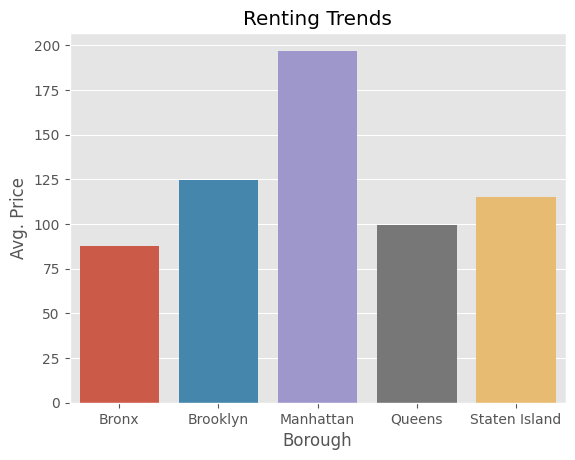

In [11]:
# Following chart shows that Manhatten is the most expensive and Bronx is cheapest of all 5 borough
bnb_price_df=bnb_df.groupby('neighbourhood_group')['price'].mean()
bnb_price_df = bnb_price_df.reset_index()

sns.barplot(data=bnb_price_df,y='price',x='neighbourhood_group')
plt.title('Renting Trends')
plt.xlabel('Borough')
plt.ylabel('Avg. Price')
plt.show()

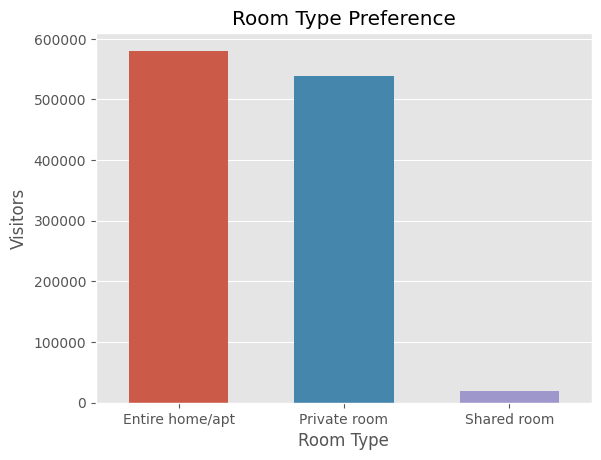

In [12]:
# Following chart shows visitors generally prefer booking for entire home or apartment while they stay
bnb_count_df=bnb_df.groupby('room_type')['number_of_reviews'].sum()
bnb_count_df = bnb_count_df.reset_index()
bnb_count_df

sns.barplot(data=bnb_count_df,y='number_of_reviews',x='room_type',width=0.6)
plt.xlabel('Room Type')
plt.ylabel('Visitors')
plt.title('Room Type Preference')
plt.show()

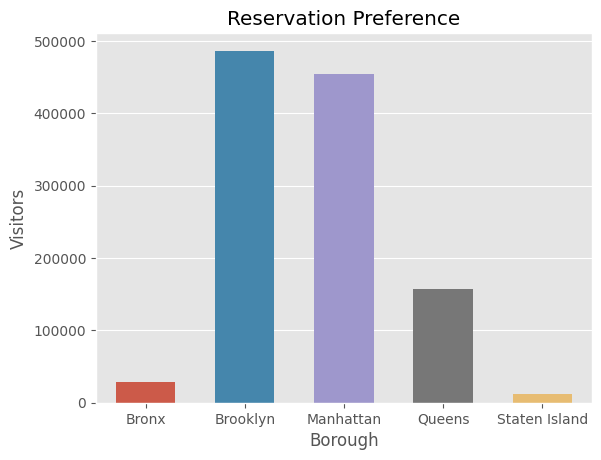

In [13]:
# Following chart shows visitors generally prefer Brooklyn over Manhattan for their stay
bnb_count_df=bnb_df.groupby('neighbourhood_group')['number_of_reviews'].sum()
bnb_count_df = bnb_count_df.reset_index()
bnb_count_df

sns.barplot(data=bnb_count_df,y='number_of_reviews',x='neighbourhood_group',width=0.6)
plt.xlabel('Borough')
plt.ylabel('Visitors')
plt.title('Reservation Preference')
plt.show()

In [14]:
bronx_df = bnb_df[bnb_df['neighbourhood_group'] == 'Bronx']
bronx_df=bronx_df.groupby('neighbourhood')['number_of_reviews'].count().reset_index()
bronx_df = bronx_df.sort_values('number_of_reviews',ascending=False).head()
bronx_df.loc[:,'neighbourhood_group'] = 'Bronx'
# bronx_df

brooklyn_df = bnb_df[bnb_df['neighbourhood_group'] == 'Brooklyn']
brooklyn_df=brooklyn_df.groupby('neighbourhood')['number_of_reviews'].count().reset_index()
brooklyn_df = brooklyn_df.sort_values('number_of_reviews',ascending=False).head()
brooklyn_df.loc[:,'neighbourhood_group'] = 'Brooklyn'
# brooklyn_df

manhattan_df = bnb_df[bnb_df['neighbourhood_group'] == 'Manhattan']
manhattan_df=manhattan_df.groupby('neighbourhood')['number_of_reviews'].count().reset_index()
manhattan_df = manhattan_df.sort_values('number_of_reviews',ascending=False).head()
manhattan_df.loc[:,'neighbourhood_group'] = 'Manhattan'
# manhattan_df

queens_df = bnb_df[bnb_df['neighbourhood_group'] == 'Queens']
queens_df= queens_df.groupby('neighbourhood')['number_of_reviews'].count().reset_index()
queens_df = queens_df.sort_values('number_of_reviews',ascending=False).head()
queens_df.loc[:,'neighbourhood_group'] = 'Queens'
# queens_df

staten_df = bnb_df[bnb_df['neighbourhood_group'] == 'Staten Island']
staten_df= staten_df.groupby('neighbourhood')['number_of_reviews'].count().reset_index()
staten_df = staten_df.sort_values('number_of_reviews',ascending=False).head()
staten_df.loc[:,'neighbourhood_group'] = 'Staten Island'
# staten_df

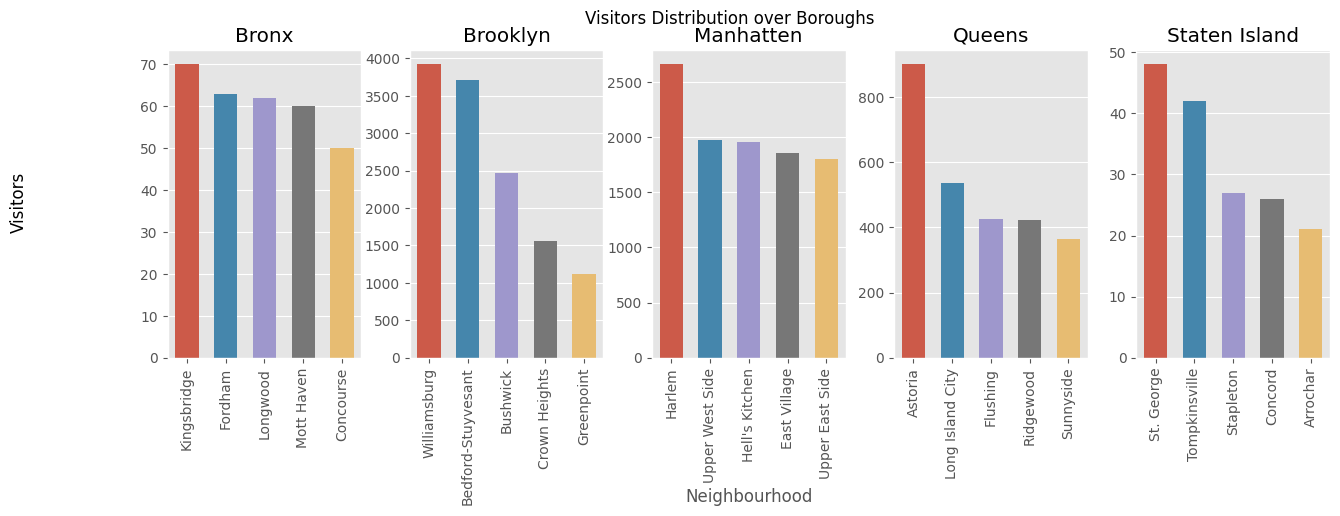

In [46]:
fig,axis = plt.subplots(1,5,figsize = (15,4))

fig.suptitle('Visitors Distribution over Boroughs')
fig.supylabel('Visitors')

sns.barplot(ax=axis[0], data=bronx_df,x='neighbourhood',y='number_of_reviews',width=0.6)
axis[0].set_title('Bronx')
axis[0].set_xlabel('')
axis[0].set_ylabel('')


sns.barplot(ax=axis[1], data=brooklyn_df,x='neighbourhood',y='number_of_reviews',width=0.6)
axis[1].set_title('Brooklyn')
axis[1].set_xlabel('')
axis[1].set_ylabel('')


sns.barplot(ax=axis[2], data=manhattan_df,x='neighbourhood',y='number_of_reviews',width=0.6)
axis[2].set_title('Manhatten')
axis[2].set_xlabel('Neighbourhood')
axis[2].set_ylabel('')


sns.barplot(ax=axis[3], data=queens_df,x='neighbourhood',y='number_of_reviews',width=0.6)
axis[3].set_title('Queens')
axis[3].set_xlabel('')
axis[3].set_ylabel('')


sns.barplot(ax=axis[4], data=staten_df,x='neighbourhood',y='number_of_reviews',width=0.6)
axis[4].set_title('Staten Island')
axis[4].set_xlabel('')
axis[4].set_ylabel('')


# fig.delaxes(axis[1,2])


for col in range(5):
  axis[col].tick_params(axis='x', rotation=90, ha='center')

fig.subplots_adjust(hspace=0.6, wspace=0.25)

plt.show()

In [16]:
# The above graph shows top 5 most visited neighborhoods in each borough. Following are the most visited neighbourhood:
# 1. Kingsbridge for Bronx
# 2. Williamsburg for Brooklyn
# 3. Harlem for Manhatten
# 4. Astoria for Queens
# 5. St. George for Staten Island

In [17]:
count_dict={}
freq_lst=[]
most_freq_dict={}

def split_sentence(sentence):
  sentence = sentence.lower()
  words=sentence.split(' ')
  for word in words:
    count_words(word)

def count_words(x):
  if x in count_dict:
    count_dict[x]+=1
  else:
    count_dict[x] = 1


bnb_df['name'].apply(lambda x: split_sentence(x))

for key,val in count_dict.items():
  freq_lst.append(val)

freq_lst.sort()
freq_lst.reverse()
freq_lst=freq_lst[:16]

for val in freq_lst:
  for key,value in count_dict.items():
    if value == val:
      most_freq_dict.update({key:value})
      break

print(most_freq_dict)

df = pd.DataFrame({"words":most_freq_dict.keys(), "count":most_freq_dict.values()})

print(df)





{'in': 16730, 'room': 9381, 'bedroom': 7228, 'private': 6982, 'apartment': 6108, 'cozy': 4632, 'the': 3869, 'to': 3827, 'studio': 3772, 'brooklyn': 3625, 'apt': 3571, 'spacious': 3386, '1': 3354, 'with': 3091, '2': 3076, 'of': 2993}


,words,count
0,in,16730
1,room,9381
2,bedroom,7228
3,private,6982
4,apartment,6108
5,cozy,4632
6,the,3869
7,to,3827
8,studio,3772
9,brooklyn,3625


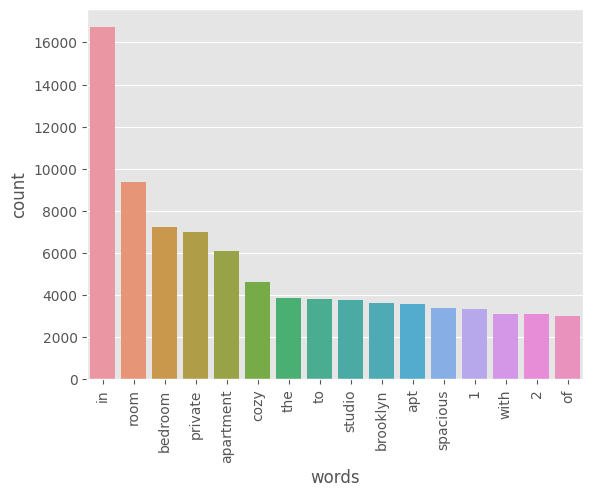

In [18]:
sns.barplot(data=df,x='words',y='count')
plt.xticks(rotation='vertical',ha='center')
plt.show()

In [19]:
# The above trend shows use of friendly words in listing process can be helpful for visitors
# in process of their booking. This gives more options for their searches, with compatitive pricing
# thus increasing chances of turning them into a lead. From business prospective, motivating
# new property listers by introducing suggestions on enter detail section we can expact good
# chances of getting new property bookings which is helpful in business expansion.